In [16]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [17]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [32]:
from pathlib import Path
from tqdm.auto import tqdm

def load_data(path_audios='./dataset'):
    """
    Generation of the dataframe with the information of the dataset. The dataframe has the following structure:
     ______________________________________________________________________________________________________________________________
    |             name            |                     path                                   |     emotion      |     actor     |
    ______________________________________________________________________________________________________________________________
    |  01-01-01-01-01-01-01.wav   |    <RAVDESS_dir>/audios_16kHz/01-01-01-01-01-01-01.wav     |     Neutral      |     1         |
    ______________________________________________________________________________________________________________________________
    ...
    :param path_audios: Path to the folder that contains all the audios in .wav format, 16kHz and single-channel(mono)
    """
    x, y = [], []
    for path in tqdm(Path(path_audios).glob("**/*.wav")):
        name = str(path).split('/')[-1].split('.')[0]
        label = int(name.split("-")[2]) - 1

        try:
            feature = extract_feature(path, mfcc=True, chroma=True, mel=True, zcr=True, rmse=True)
            x.append(feature)
            y.append(label)
            
        except Exception as e:
            # print(str(path), e)
            pass
    
    return x, y

In [33]:
x, y = load_data()

0it [00:00, ?it/s]

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,a

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -6.1035156e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-6.7138672e-04 -7.0190430e-04 -7.0190430e-04 ...  0.0000000e+00
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.0894775e-02
 -9.8571777e-03 -1.3732910e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an 

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00036621 0.00030518 0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fea

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  4.2724609e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 2.4414062e-04  2.4414062e-04  2.1362305e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fea

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -9.1552734e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -3.0517578e-05 ...  1.0681152e-03
  1.1291504e-03  1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-2.1362305e-04 -1.8310547e-04 -1.8310547e-04 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[1.2207031e-04 1.5258789e-04 1.2207031e-04 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.00015259 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libro

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -2.1362305e-04
 -2.4414062e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.00067139 0.0007019  0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libro

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05  6.1035156e-05 ...  3.0517578e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[2.4414062e-04 2.1362305e-04 9.1552734e-05 ... 6.1035156e-05 4.8828125e-04
 2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[6.1035156e-05 1.2207031e-04 1.5258789e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00018311 ... -0.00018311 -0.00018311
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -1.2207031e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.00158691
 -0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00042725 0.00042725 0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00140381 0.00143433 0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error


C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-0.00012207 -0.00015259 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 1.2207031e-04 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fea

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -1.2207031e-04 ...  3.9672852e-04
  3.9672852e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-2.8686523e-03 -2.8381348e-03 -2.8686523e-03 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an 

C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-0.00024414 -0.00097656 -0.00158691 ... -0.0010376  -0.00073242
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[-0.00204468 -0.00164795 -0.00100708 ...  0.00097656  0.00244141
  0.00210571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\devLupin\AppData\Local\Temp\ipykernel_8920\4073899324.py:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

In [34]:
x_train,x_test,y_train,y_test = train_test_split(np.array(x), y, test_size=.2)

In [37]:
x_train.shape,len(y_train)

((1148, 182), 1148)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [39]:
import time
start = time.time()

In [40]:
model=MLPClassifier(alpha=0.0001, batch_size=64, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='constant',activation='logistic',solver='adam',max_iter=600)
model.fit(x_train,y_train)

MLPClassifier(activation='logistic', batch_size=64, hidden_layer_sizes=(500,),
              max_iter=600)

In [41]:
end = time.time()
train_time_total=end-start
print(train_time_total)

27.029852390289307


In [42]:
start = time.time()
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
end = time.time()
test_time_total=end-start
print(test_time_total)

Logistic-Accuracy: 72.47%
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.71      0.83      0.76        35
           2       0.81      0.74      0.77        39
           3       0.50      0.76      0.60        29
           4       0.80      0.77      0.79        43
           5       0.79      0.62      0.70        48
           6       0.65      0.75      0.70        32
           7       0.83      0.73      0.78        41

    accuracy                           0.72       287
   macro avg       0.73      0.72      0.72       287
weighted avg       0.74      0.72      0.73       287

0.008704900741577148


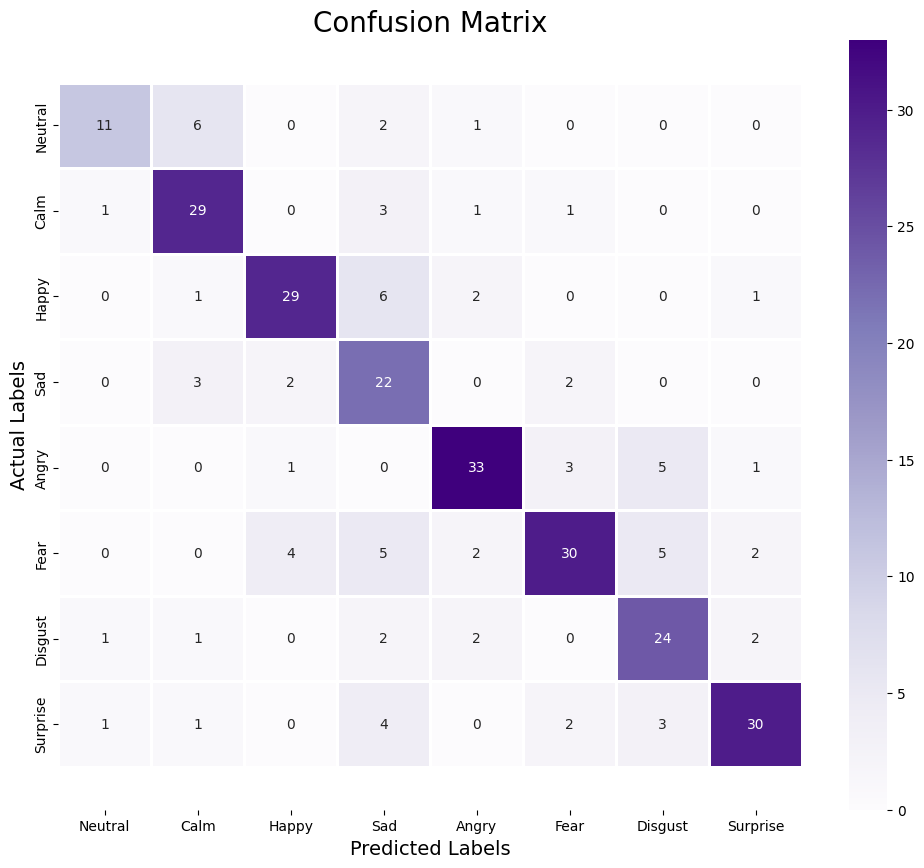

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12, 10))
matrix = pd.DataFrame(cm , index = ["Neutral","Calm","Happy","Sad","Angry","Fear","Disgust","Surprise"] , columns = ["Neutral","Calm","Happy","Sad","Angry","Fear","Disgust","Surprise"])
ax = sns.heatmap(matrix, linecolor='white', cmap='Purples', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
# plt.savefig('..//Pictures//Confusion_matrix.png') 
plt.show()

In [47]:
from imblearn.metrics import specificity_score
s=specificity_score(y_test,y_pred,average='macro')
print(s)

0.9607521935489023


In [48]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(x_test)
auc=roc_auc_score(y_test, y_pred, average='macro',multi_class='ovo')
print(auc)

0.9500808953655311


In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred=model.predict(x_test)
p=precision_score(y_test, y_pred,average='macro')
r=recall_score(y_test, y_pred,average='macro')
f=f1_score(y_test, y_pred,average='macro')
print(p,r,f)

0.7343650786766962 0.719366379919329 0.718068929384968


In [50]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[0.55       0.82857143 0.74358974 0.75862069 0.76744186 0.625
 0.75       0.73170732]
[0.01203024 0.06924708 0.02507924 0.08625544 0.03343145 0.03086927
 0.04194521 0.02186622]


In [51]:
from pandas import DataFrame
C = {
     'test acc':[str(accuracy)],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'total train time':[str(train_time_total)],
     'total test time':[str(test_time_total)]}
df = DataFrame(C, columns= ['test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','total train time','total test time'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

OSError: Cannot save file into a non-existent directory: 'E:\'

In [ ]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'E:\result3.csv', index = None, header=True) 
print (df)